In [1]:
from SonicBatt import utils
import os
import json
import numpy as np
import matplotlib.pyplot as plt

root_dir = utils.root_dir()
study_path = os.path.join(root_dir, 'studies', 'degradation')
data_path = os.path.join(study_path, 'Raw Data')
visualistion_path = os.path.join(study_path, 'Visualisation')
ancillary_data_path = os.path.join(study_path, 'Ancillary Data')

with open(os.path.join(ancillary_data_path,'stats_exp1.json'), 'r') as fp:
    stats_exp1 = json.load(fp)
with open(os.path.join(ancillary_data_path,'stats_pct_exp1.json'), 'r') as fp:
    stats_pct_exp1 = json.load(fp)
with open(os.path.join(ancillary_data_path,'stats_exp2.json'), 'r') as fp:
    stats_exp2 = json.load(fp)
with open(os.path.join(ancillary_data_path,'stats_pct_exp2.json'), 'r') as fp:
    stats_pct_exp2 = json.load(fp)


In [2]:
# For labelling
quantity_labels = {
    'cycle': 'Cycle number',
    'tofs_rise': '$\mathrm{ΔToF_{rise}}$\n(nanoseconds)',
    'tofs_rise_pct': '$\mathrm{ΔToF_{rise}}$\n(%)',
    'temps_pre_means': '$\mathrm{T_0}$ ($^\circ$C)',
    'temps_rise': '$\mathrm{ΔTemp_{rise}}$\n($^\circ$C)',
    'pre_pulse_ocv': 'OCV (V)\nbefore\npulse',
}
quantity_labels_unitless = {
    'cycle': 'Cycle',
    'tofs_rise': '$\mathrm{ΔToF_{rise}}$',
    'temps_pre_means': '$\mathrm{T_0}$',
    'temps_rise': '$\mathrm{ΔTemp_{rise}}$',
    'pre_pulse_ocv': 'OCV\nbefore\npulse',
}


In [3]:
# Exp 1
Regression_slopes = {
    'exp1': stats_exp1['Regression_slopes'],
    'exp2': stats_exp2['Regression_slopes']
}
Pearsons = {
    'exp1': stats_exp1['Pearsons'],
    'exp2': stats_exp2['Pearsons']
}
Spearman = {
    'exp1': stats_exp1['Spearman'],
    'exp2': stats_exp2['Spearman']
}
Standard_devs = {
    'exp1': stats_exp1['Standard_devs'],
    'exp2': stats_exp2['Standard_devs']
}
Standard_devs_pct = {
    'exp1': stats_pct_exp1['Standard_devs'],
    'exp2': stats_pct_exp2['Standard_devs']
}

# 
quantities = ['pre_pulse_ocv', 'tofs_rise','temps_rise', 'temps_pre_means']
ocvs_pre_mean = {
    'exp1': [4.19163571, 4.00666286, 3.80717429, 3.62407857],
    'exp2': [
    4.178092, 4.132553, 4.0898615, 4.054961, 3.9889635,
    3.9478755, 3.91864, 3.88779 , 3.8622905, 3.840262,
    3.8201255, 3.7996575, 3.776744, 3.750514, 3.7186955]
}
marker = {
    'exp1': 'v',
    'exp2': 'o'
}
marker_s = {
    'exp1': 20,
    'exp2': 20
}
marker_c = {
    'exp1': 'tab:red',
    'exp2': 'cyan'
}


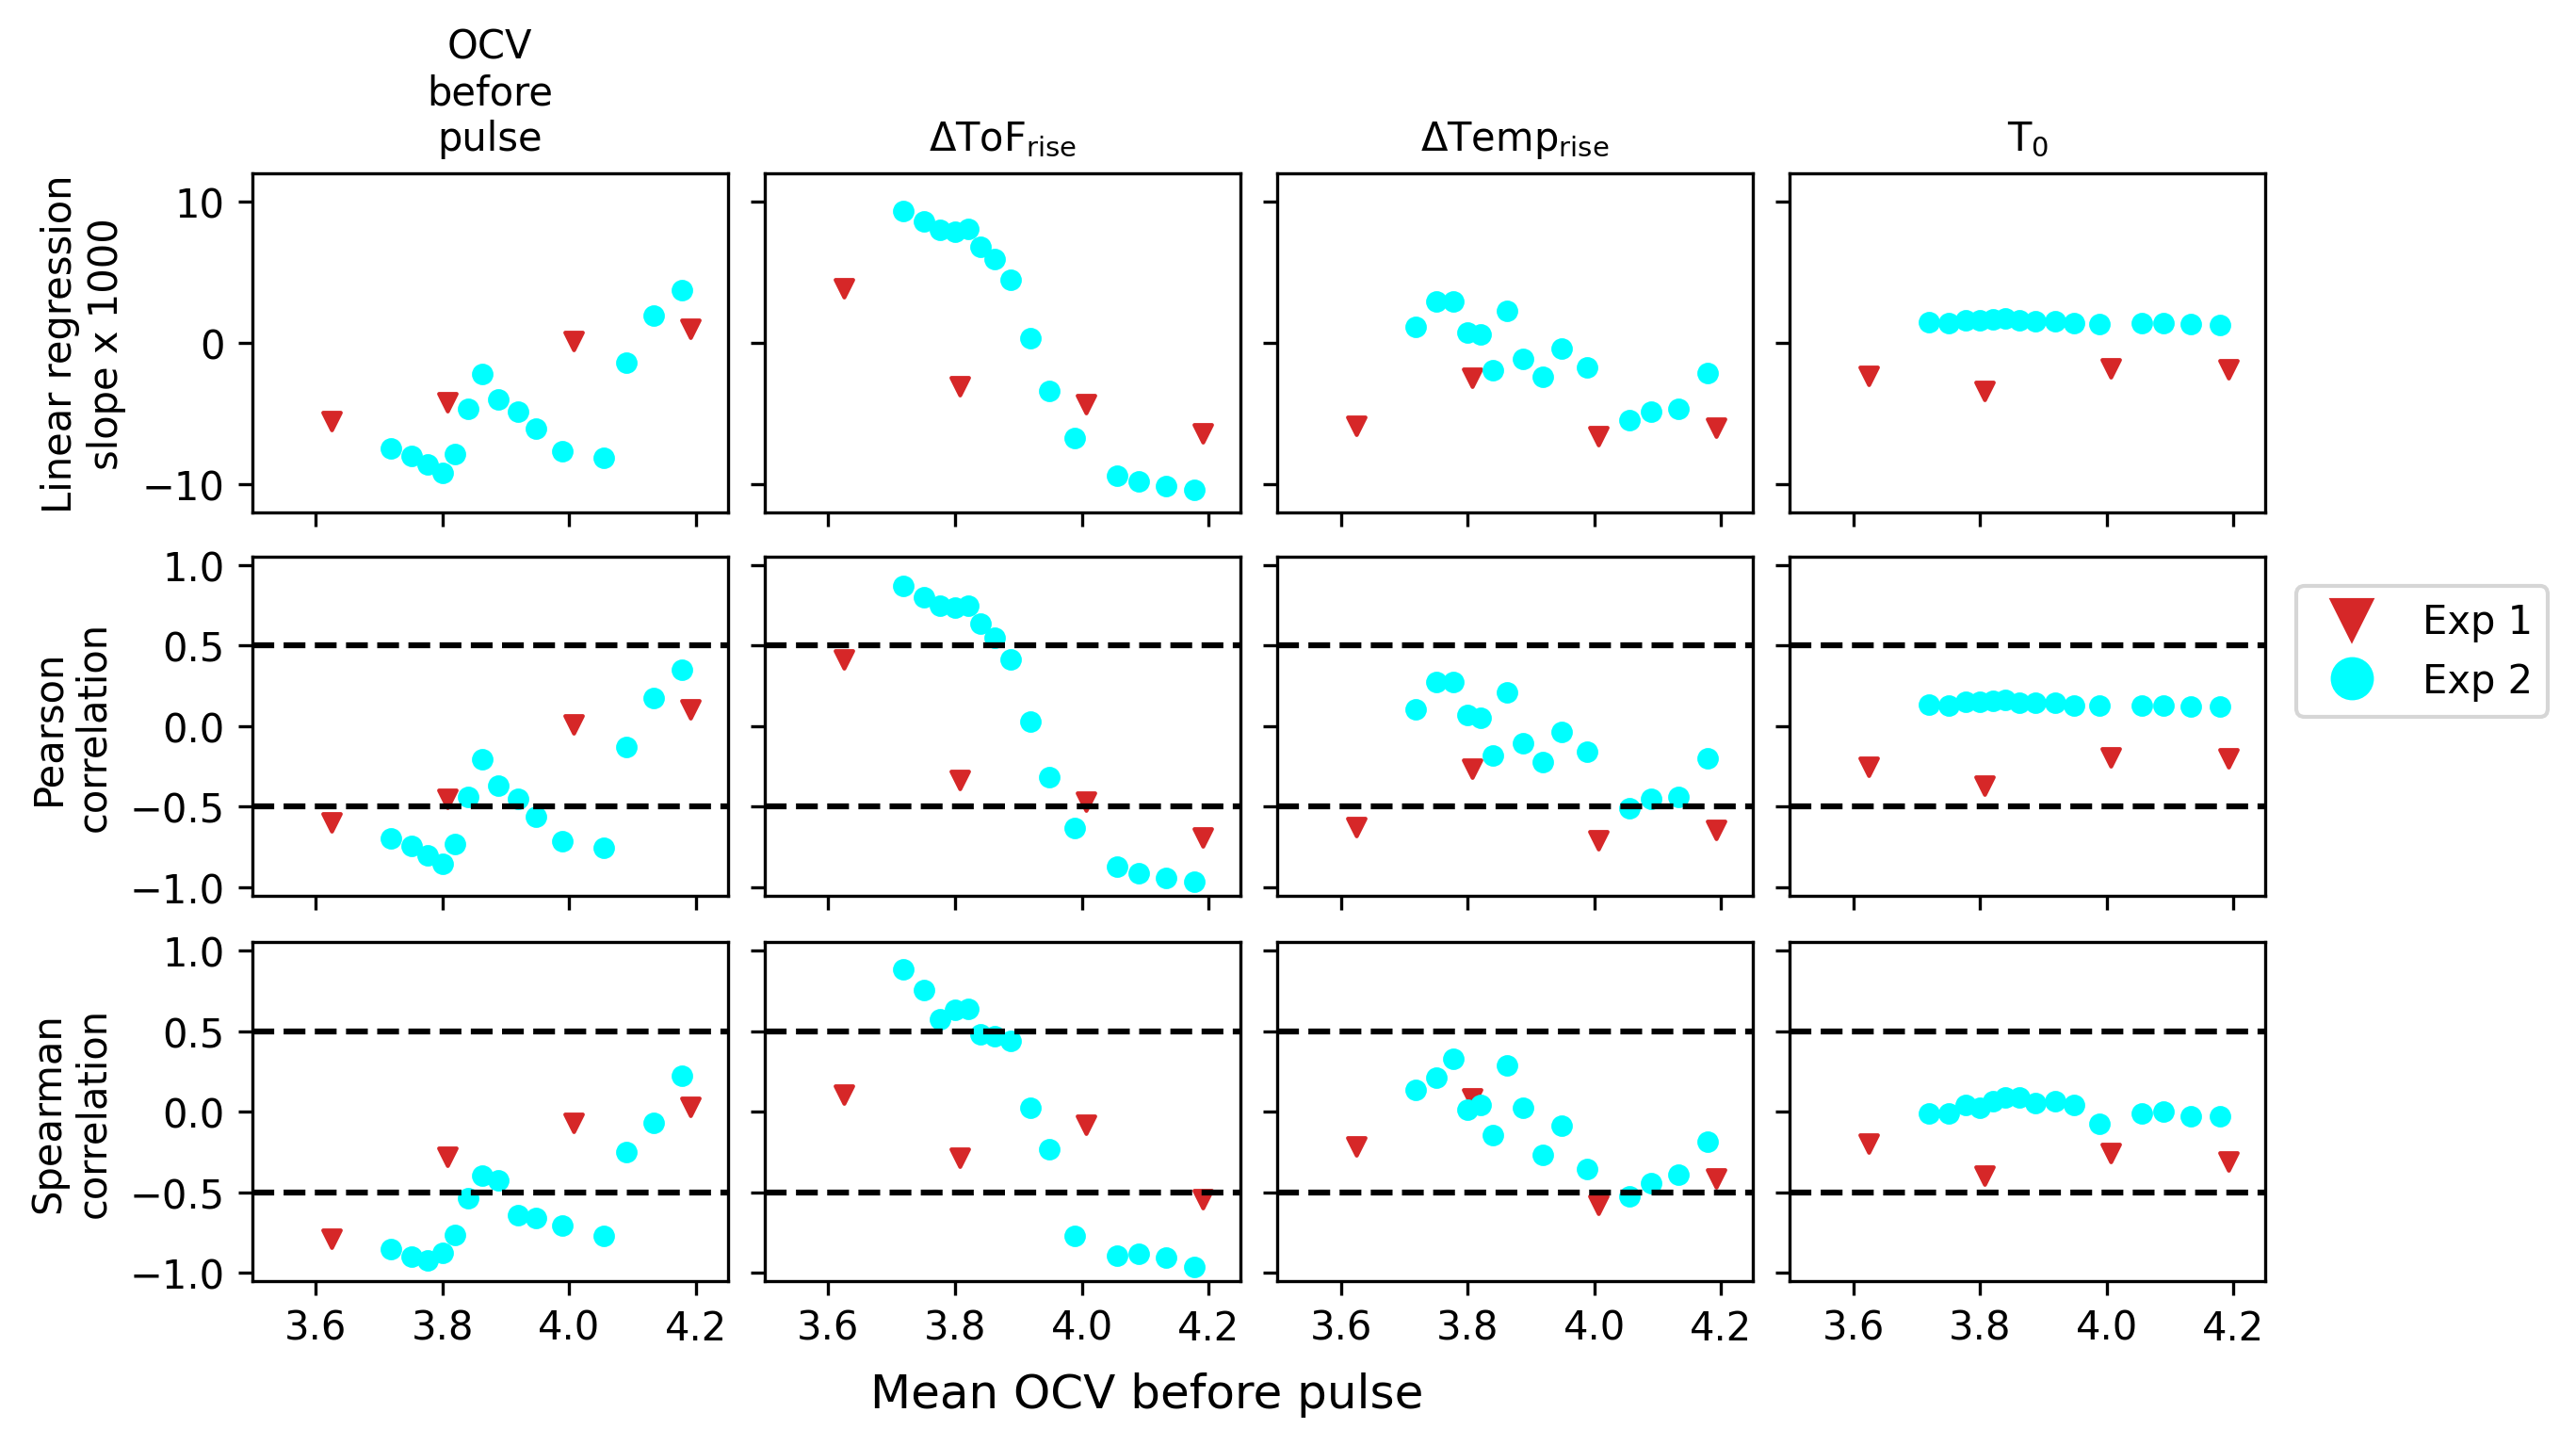

In [4]:
# Macro-trends: Regression
f, axs = plt.subplots(3, len(quantities), sharex=True, sharey='row',
        figsize=(8,5), constrained_layout=True, dpi=300)
f.patch.set_facecolor('white')

for exp in ['exp1', 'exp2']:
    for j, quantity in enumerate(quantities):
        # Convert voltage to mV
        axs[0,j].scatter(ocvs_pre_mean[exp], np.array(Regression_slopes[exp][quantity])*1000,
            color=marker_c[exp], s=marker_s[exp], marker=marker[exp])
        axs[1,j].scatter(ocvs_pre_mean[exp], Pearsons[exp][quantity],
            color=marker_c[exp], s=marker_s[exp], marker=marker[exp])
        axs[2,j].scatter(ocvs_pre_mean[exp], Spearman[exp][quantity],
            color=marker_c[exp], s=marker_s[exp], marker=marker[exp])    
        axs[0,j].set_title(quantity_labels_unitless[quantity], fontsize=10)

axs[0,0].set_xlim(3.5, 4.25)
axs[0,0].set_xticks([3.6, 3.8, 4.0, 4.2])
axs[0,0].set_ylim(-12,12)
axs[1,0].set_ylim(-1.05, 1.05)
axs[1,0].set_yticks([-1, -0.5, 0, 0.5, 1])
axs[2,0].set_ylim(-1.05, 1.05)
axs[2,0].set_yticks([-1, -0.5, 0, 0.5, 1])

# Add dashed lines at correlation coefficients = +/- 0.5
for i in [1,2]:
    for j in range(len(quantities)):
        x_lim = axs[i,j].get_xlim()
        axs[i,j].plot([x_lim[0], x_lim[1]], [0.5,0.5], color='k', linestyle='dashed')
        axs[i,j].plot([x_lim[0], x_lim[1]], [-0.5,-0.5], color='k', linestyle='dashed')
        axs[i,j].set_xlim(x_lim)

# Label y axes
axs[0,0].set_ylabel('Linear regression\nslope x 1000',
    labelpad=15, ha='center', va='center')
axs[1,0].set_ylabel('Pearson\ncorrelation',
    labelpad=15, ha='center', va='center')
axs[2,0].set_ylabel('Spearman\ncorrelation',
    labelpad=15, ha='center', va='center')

f.supxlabel('Mean OCV before pulse')

# Make legend
import matplotlib.lines as mlines
handles = []
handles.append(mlines.Line2D([], [], marker=marker['exp1'], linestyle='None',
               color=marker_c['exp1'], markersize=10, label='Exp 1'))
handles.append(mlines.Line2D([], [], marker=marker['exp2'], linestyle='None',
               color=marker_c['exp2'], markersize=10, label='Exp 2'))

f.legend(handles=handles, loc='center left',
         bbox_to_anchor=(1.0, 0.55), markerscale=1)

save_filename = 'Exp1_vs_Exp2_correlations'
utils.save_figure(f, visualistion_path, save_filename, 'png')


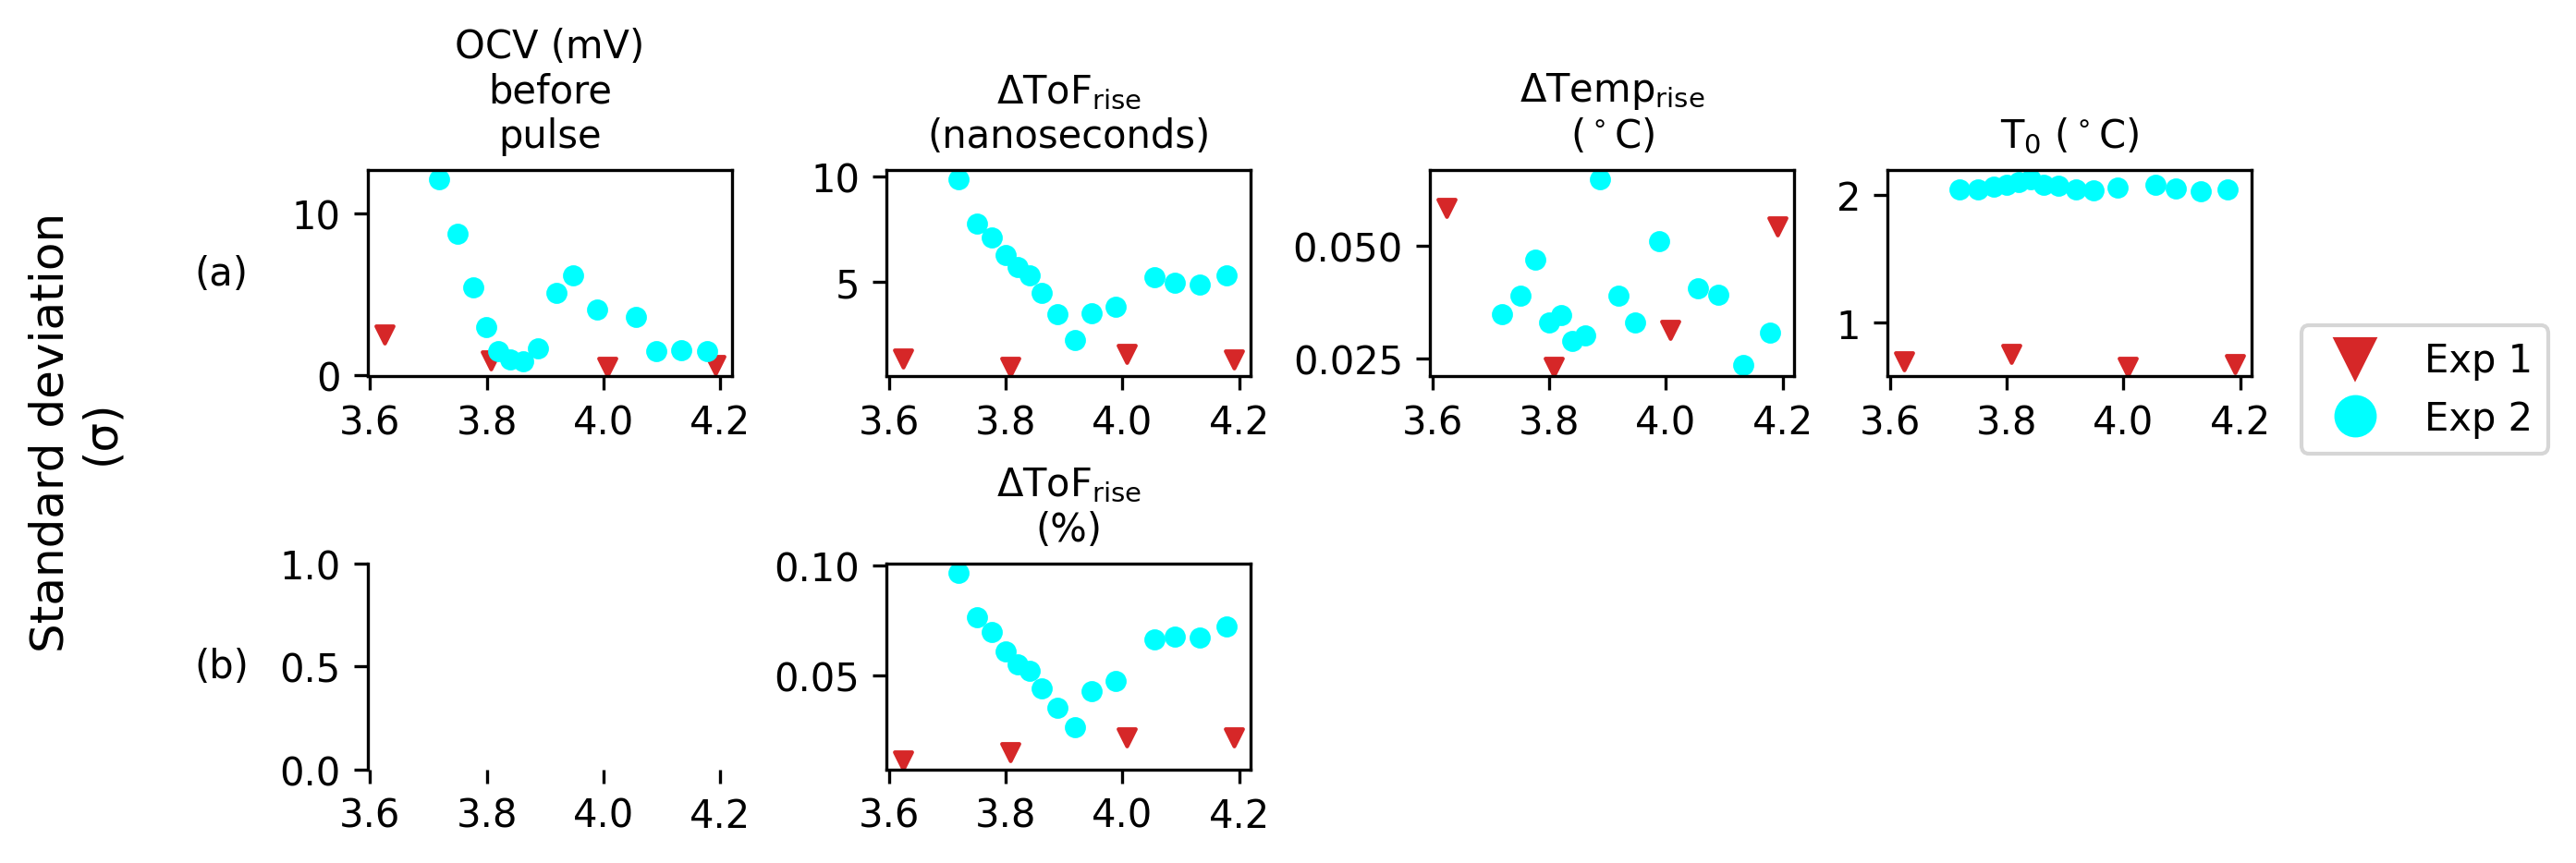

In [5]:
# Macro-trends: Standard Deviations
f, axs = plt.subplots(2, len(quantities), sharex='row', sharey=False,
        figsize=(8,3), constrained_layout=True, dpi=300)
f.patch.set_facecolor('white')

for exp in ['exp1', 'exp2']:
    for j, quantity in enumerate(quantities):
        if (quantity != 'pre_pulse_ocv') & (quantity != 'post_pulse_ocv'):
            axs[0,j].scatter(
                ocvs_pre_mean[exp], Standard_devs[exp][quantity],
                color=marker_c[exp], s=marker_s[exp], marker=marker[exp])
            axs[0, j].set_title(
                quantity_labels[quantity], fontsize=10)  
        else:
            axs[0,j].scatter(
                ocvs_pre_mean[exp], np.array(Standard_devs[exp][quantity])*1000,
                color=marker_c[exp], s=marker_s[exp], marker=marker[exp]) # Convert to mV for voltage data
            axs[0, j].set_title(
            'OCV (mV)\nbefore\npulse', fontsize=10)

# Add standard deviation stats for percentage quantities
for exp in ['exp1', 'exp2']:
    for j, quantity in enumerate(['tofs_rise_pct']):
        axs[1, j+1].scatter(ocvs_pre_mean[exp], Standard_devs_pct[exp][quantity],
                color=marker_c[exp], s=marker_s[exp], marker=marker[exp])
        axs[1, j+1].set_title(
            quantity_labels[quantity], fontsize=10)

# Turn off unused axes
for j in [2,3]:
    axs[1,j].axis('off')
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['bottom'].set_visible(False)

axs[0,0].set_xticks([3.6, 3.8, 4.0, 4.2])
axs[1,0].set_xticks([3.6, 3.8, 4.0, 4.2])
# axs[1,0].set_ylim([0, 0.025])
# axs[1,0].set_yticks([0, 0.01, 0.02])
axs[0,0].set_ylabel('(a)',
    labelpad=15, ha='center', va='center', rotation=0)
axs[1,0].set_ylabel('(b)',
    labelpad=15, ha='center', va='center', rotation=0)
f.align_ylabels()
f.supylabel('Standard deviation\n(σ)', ha='center')

# Make legend
import matplotlib.lines as mlines
handles = []
handles.append(mlines.Line2D([], [], marker=marker['exp1'], linestyle='None',
               color=marker_c['exp1'], markersize=10, label='Exp 1'))
handles.append(mlines.Line2D([], [], marker=marker['exp2'], linestyle='None',
               color=marker_c['exp2'], markersize=10, label='Exp 2'))

f.legend(handles=handles, loc='center left',
         bbox_to_anchor=(1.0, 0.55), markerscale=1)

save_filename = 'Exp1_vs_Exp2_stds'
utils.save_figure(f, visualistion_path, save_filename, 'png')
